In [ ]:
!pip install statsmodels
!pip install wquantiles
import pandas as pd
import numpy as np
from statsmodels import robust
import wquantiles
import seaborn as sns
import matplotlib.pyplot as plt

## Cargamos Base de datos

In [ ]:
# importamos la base de datos
CausasMuerte = pd.read_csv("/content/annual_deaths_by_causes.csv")

In [ ]:
#Ya que la base de datos es en ingles realizamos el cambio de nombre de las columnas a español
colmuns_name = ['pais',
                'codigo',
                'año',
                'por_meningitis',
                'por_alzheimer',
                'por_parkinson',
                'por_deficiencia_nutricional',
                'por_malaria',
                'por_ahogo',
                'por_violencia_interpersonal',
                'por_trastornos_maternos',
                'por_vih_sida',
                'por_uso_drogas',
                'por_tuberculosis',
                'por_enfermedades_cardiovasculares',
                'por_infecciones_respiratorias_leves',
                'por_trastornos_neonatales',
                'por_uso_alcohol',
                'por_autolesiones',
                'por_fuerzas_de_la_naturaleza',
                'por_enfermedades__diarreicas',
                'por_exposicion_al_calor_o_frio',
                'por_neoplasias',
                'por_guerras_terrorismo',
                'por_diabetes_mellitus',
                'por_enfermerdad_renal_cronica',
                'por_envenenamiento',
                'por_desnutricion',
                'por_terrorismo',
                'por_accidentes_de_transito',
                'por_enfermerdades_respirtatorias_cronicas',
                'por_enfermedades_linfaticas_cronicas',
                'por_enfermedades_digestivas',
                'por_sustancias_de_calor_fuego',
                'por_hepatitis_aguda'
                ]

df_causas_muertes = CausasMuerte
df_causas_muertes.columns = colmuns_name


Realizamos una suma de todas las causas de muerte por pais para poder tener un dato a comparar y lo agregamos como ultima columna en la base de datos

In [ ]:
CausasMuerte['TotalMuertos'] = CausasMuerte[['por_meningitis',
                'por_alzheimer',
                'por_parkinson',
                'por_deficiencia_nutricional',
                'por_malaria',
                'por_ahogo',
                'por_violencia_interpersonal',
                'por_trastornos_maternos',
                'por_vih_sida',
                'por_uso_drogas',
                'por_tuberculosis',
                'por_enfermedades_cardiovasculares',
                'por_infecciones_respiratorias_leves',
                'por_trastornos_neonatales',
                'por_uso_alcohol',
                'por_autolesiones',
                'por_fuerzas_de_la_naturaleza',
                'por_enfermedades__diarreicas',
                'por_exposicion_al_calor_o_frio',
                'por_neoplasias',
                'por_guerras_terrorismo',
                'por_diabetes_mellitus',
                'por_enfermerdad_renal_cronica',
                'por_envenenamiento',
                'por_desnutricion',
                'por_terrorismo',
                'por_accidentes_de_transito',
                'por_enfermerdades_respirtatorias_cronicas',
                'por_enfermedades_linfaticas_cronicas',
                'por_enfermedades_digestivas',
                'por_sustancias_de_calor_fuego',
                'por_hepatitis_aguda']].fillna(0).sum(axis=1)
CausasMuerte

,pais,codigo,año,por_meningitis,por_alzheimer,por_parkinson,por_deficiencia_nutricional,por_malaria,por_ahogo,por_violencia_interpersonal,...,por_envenenamiento,por_desnutricion,por_terrorismo,por_accidentes_de_transito,por_enfermerdades_respirtatorias_cronicas,por_enfermedades_linfaticas_cronicas,por_enfermedades_digestivas,por_sustancias_de_calor_fuego,por_hepatitis_aguda,TotalMuertos
0,Afghanistan,AFG,2007,2933.0,1402.0,450.0,2488.0,393.0,2127.0,3657.0,...,512.0,2439.0,1199.0,7425.0,7222.0,3346.0,6458.0,481.0,3437.0,204796.0
1,Afghanistan,AFG,2008,2731.0,1424.0,455.0,2277.0,255.0,1973.0,3785.0,...,495.0,2231.0,1092.0,7355.0,7143.0,3316.0,6408.0,462.0,3005.0,200209.0
2,Afghanistan,AFG,2009,2460.0,1449.0,460.0,2040.0,239.0,1852.0,3874.0,...,483.0,1998.0,1065.0,7290.0,7045.0,3291.0,6358.0,448.0,2663.0,195927.0
3,Afghanistan,AFG,2011,2327.0,1508.0,473.0,1846.0,390.0,1775.0,4170.0,...,483.0,1805.0,1525.0,7432.0,6916.0,3318.0,6370.0,448.0,2365.0,196559.0
4,Afghanistan,AFG,2012,2254.0,1544.0,482.0,1705.0,94.0,1716.0,4245.0,...,482.0,1667.0,3521.0,7494.0,6878.0,3353.0,6398.0,445.0,2264.0,200364.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7268,Zimbabwe,ZWE,2015,1439.0,754.0,215.0,3019.0,2518.0,770.0,1302.0,...,381.0,2990.0,NaN,2373.0,2751.0,1956.0,4202.0,632.0,146.0,130080.0
7269,Zimbabwe,ZWE,2016,1457.0,767.0,219.0,3056.0,2050.0,801.0,1342.0,...,393.0,3027.0,NaN,2436.0,2788.0,1962.0,4264.0,648.0,146.0,128274.0
7270,Zimbabwe,ZWE,2017,1460.0,781.0,223.0,2990.0,2116.0,818.0,1363.0,...,398.0,2962.0,0.0,2473.0,2818.0,2007.0,4342.0,654.0,144.0,126515.0
7271,Zimbabwe,ZWE,2018,1450.0,795.0,227.0,2918.0,2088.0,825.0,1396.0,...,400.0,2890.0,NaN,2509.0,2849.0,2030.0,4377.0,657.0,139.0,123506.0


## 1. Varianza:
Suma de los cuadrados de las desviaciones de la media al cuadrado dividida por n-1, donde **n** e el número de valores de datos
## 2. Desviación Estándar
Raíz cuadrada de la varianza
## 3. Desviación media absoluta
Media de valores absolutos de las desviaciones de la media.
## 4. Desviación absoluta de la mediana (MAD)
Mediana de los valores absolutos de las desviaciones de la mediana.
## 5. Rango
La diferencia entre el valor máximo y mínimo de un conjunto de datos
## 6. Estadística ordinal
Métricas basadas en los valores de datos ordenados de mayor a menor
## 7. Percentil
Valor tal que P por ciento de los valores toma este valor o oun vaor inferior y para (100-P) el porcentaje toma este valor superior
## 8. Rango Intercuartil (IQR)
Diferencia entre el percentil 75 y el percentil 25

In [ ]:
CausasMuerte.head()

,pais,codigo,año,por_meningitis,por_alzheimer,por_parkinson,por_deficiencia_nutricional,por_malaria,por_ahogo,por_violencia_interpersonal,...,por_envenenamiento,por_desnutricion,por_terrorismo,por_accidentes_de_transito,por_enfermerdades_respirtatorias_cronicas,por_enfermedades_linfaticas_cronicas,por_enfermedades_digestivas,por_sustancias_de_calor_fuego,por_hepatitis_aguda,TotalMuertos
0,Afghanistan,AFG,2007,2933.0,1402.0,450.0,2488.0,393.0,2127.0,3657.0,...,512.0,2439.0,1199.0,7425.0,7222.0,3346.0,6458.0,481.0,3437.0,204796.0
1,Afghanistan,AFG,2008,2731.0,1424.0,455.0,2277.0,255.0,1973.0,3785.0,...,495.0,2231.0,1092.0,7355.0,7143.0,3316.0,6408.0,462.0,3005.0,200209.0
2,Afghanistan,AFG,2009,2460.0,1449.0,460.0,2040.0,239.0,1852.0,3874.0,...,483.0,1998.0,1065.0,7290.0,7045.0,3291.0,6358.0,448.0,2663.0,195927.0
3,Afghanistan,AFG,2011,2327.0,1508.0,473.0,1846.0,390.0,1775.0,4170.0,...,483.0,1805.0,1525.0,7432.0,6916.0,3318.0,6370.0,448.0,2365.0,196559.0
4,Afghanistan,AFG,2012,2254.0,1544.0,482.0,1705.0,94.0,1716.0,4245.0,...,482.0,1667.0,3521.0,7494.0,6878.0,3353.0,6398.0,445.0,2264.0,200364.0


In [ ]:
CausasMuerte.tail(10)

,pais,codigo,año,por_meningitis,por_alzheimer,por_parkinson,por_deficiencia_nutricional,por_malaria,por_ahogo,por_violencia_interpersonal,...,por_envenenamiento,por_desnutricion,por_terrorismo,por_accidentes_de_transito,por_enfermerdades_respirtatorias_cronicas,por_enfermedades_linfaticas_cronicas,por_enfermedades_digestivas,por_sustancias_de_calor_fuego,por_hepatitis_aguda,TotalMuertos
7263,Zimbabwe,ZWE,2010,1768.0,723.0,214.0,2764.0,4546.0,712.0,1211.0,...,343.0,2734.0,1.0,2335.0,2743.0,2135.0,4152.0,601.0,148.0,161413.0
7264,Zimbabwe,ZWE,2011,1803.0,722.0,211.0,3013.0,3479.0,743.0,1222.0,...,358.0,2983.0,0.0,2335.0,2721.0,2062.0,4136.0,615.0,152.0,149614.0
7265,Zimbabwe,ZWE,2012,1586.0,724.0,209.0,3095.0,2763.0,754.0,1243.0,...,366.0,3065.0,NaN,2328.0,2708.0,2011.0,4132.0,622.0,152.0,140597.0
7266,Zimbabwe,ZWE,2013,1448.0,731.0,209.0,3017.0,3544.0,732.0,1241.0,...,362.0,2987.0,1.0,2289.0,2693.0,1964.0,4107.0,612.0,148.0,135077.0
7267,Zimbabwe,ZWE,2014,1422.0,741.0,212.0,2977.0,3685.0,734.0,1257.0,...,367.0,2948.0,0.0,2302.0,2715.0,1952.0,4138.0,615.0,146.0,132305.0
7268,Zimbabwe,ZWE,2015,1439.0,754.0,215.0,3019.0,2518.0,770.0,1302.0,...,381.0,2990.0,NaN,2373.0,2751.0,1956.0,4202.0,632.0,146.0,130080.0
7269,Zimbabwe,ZWE,2016,1457.0,767.0,219.0,3056.0,2050.0,801.0,1342.0,...,393.0,3027.0,NaN,2436.0,2788.0,1962.0,4264.0,648.0,146.0,128274.0
7270,Zimbabwe,ZWE,2017,1460.0,781.0,223.0,2990.0,2116.0,818.0,1363.0,...,398.0,2962.0,0.0,2473.0,2818.0,2007.0,4342.0,654.0,144.0,126515.0
7271,Zimbabwe,ZWE,2018,1450.0,795.0,227.0,2918.0,2088.0,825.0,1396.0,...,400.0,2890.0,NaN,2509.0,2849.0,2030.0,4377.0,657.0,139.0,123506.0
7272,Zimbabwe,ZWE,2019,1450.0,812.0,232.0,2884.0,2068.0,827.0,1434.0,...,405.0,2855.0,NaN,2554.0,2891.0,2065.0,4437.0,662.0,136.0,123540.0


In [ ]:
CausasMuerte.sample(3)

,pais,codigo,año,por_meningitis,por_alzheimer,por_parkinson,por_deficiencia_nutricional,por_malaria,por_ahogo,por_violencia_interpersonal,...,por_envenenamiento,por_desnutricion,por_terrorismo,por_accidentes_de_transito,por_enfermerdades_respirtatorias_cronicas,por_enfermedades_linfaticas_cronicas,por_enfermedades_digestivas,por_sustancias_de_calor_fuego,por_hepatitis_aguda,TotalMuertos
7093,World Bank Low Income,NaN,2008,112840.0,27683.0,7316.0,124616.0,424037.0,23825.0,35229.0,...,13306.0,120935.0,NaN,106088.0,150706.0,98775.0,167185.0,13857.0,15043.0,4906660.0
3823,Mauritius,MUS,2008,10.0,212.0,44.0,15.0,0.0,43.0,45.0,...,3.0,15.0,NaN,177.0,427.0,304.0,422.0,25.0,1.0,8715.0
4983,Portugal,PRT,2003,61.0,3430.0,838.0,126.0,0.0,152.0,234.0,...,30.0,106.0,NaN,2111.0,5856.0,2727.0,5089.0,216.0,7.0,104064.0


In [ ]:
CausasMuerte.columns

Index(['pais', 'codigo', 'año', 'por_meningitis', 'por_alzheimer',
       'por_parkinson', 'por_deficiencia_nutricional', 'por_malaria',
       'por_ahogo', 'por_violencia_interpersonal', 'por_trastornos_maternos',
       'por_vih_sida', 'por_uso_drogas', 'por_tuberculosis',
       'por_enfermedades_cardiovasculares',
       'por_infecciones_respiratorias_leves', 'por_trastornos_neonatales',
       'por_uso_alcohol', 'por_autolesiones', 'por_fuerzas_de_la_naturaleza',
       'por_enfermedades__diarreicas', 'por_exposicion_al_calor_o_frio',
       'por_neoplasias', 'por_guerras_terrorismo', 'por_diabetes_mellitus',
       'por_enfermerdad_renal_cronica', 'por_envenenamiento',
       'por_desnutricion', 'por_terrorismo', 'por_accidentes_de_transito',
       'por_enfermerdades_respirtatorias_cronicas',
       'por_enfermedades_linfaticas_cronicas', 'por_enfermedades_digestivas',
       'por_sustancias_de_calor_fuego', 'por_hepatitis_aguda', 'TotalMuertos'],
      dtype='object')

In [ ]:
CausasMuerte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7273 entries, 0 to 7272
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   pais                                       7273 non-null   object 
 1   codigo                                     6206 non-null   object 
 2   año                                        7273 non-null   int64  
 3   por_meningitis                             6840 non-null   float64
 4   por_alzheimer                              6840 non-null   float64
 5   por_parkinson                              6840 non-null   float64
 6   por_deficiencia_nutricional                6840 non-null   float64
 7   por_malaria                                6840 non-null   float64
 8   por_ahogo                                  6840 non-null   float64
 9   por_violencia_interpersonal                6840 non-null   float64
 10  por_trastornos_maternos 

In [ ]:
CausasMuerte.describe()

,año,por_meningitis,por_alzheimer,por_parkinson,por_deficiencia_nutricional,por_malaria,por_ahogo,por_violencia_interpersonal,por_trastornos_maternos,por_vih_sida,...,por_envenenamiento,por_desnutricion,por_terrorismo,por_accidentes_de_transito,por_enfermerdades_respirtatorias_cronicas,por_enfermedades_linfaticas_cronicas,por_enfermedades_digestivas,por_sustancias_de_calor_fuego,por_hepatitis_aguda,TotalMuertos
count,7273.000000,6840.000000,6.840000e+03,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6.840000e+03,...,6840.000000,6840.000000,2891.000000,6.840000e+03,6.840000e+03,6.840000e+03,6.840000e+03,6840.000000,6840.000000,7.273000e+03
mean,2004.425134,8213.149561,2.736319e+04,6493.627339,11006.353947,18903.160234,8619.055117,10636.648684,6131.066959,2.814125e+04,...,2145.455848,9531.528801,349.235905,3.063496e+04,9.130390e+04,3.189892e+04,5.652551e+04,3006.043275,3112.066520,1.182669e+06
std,8.623572,34982.933895,1.113146e+05,25767.447063,48289.687100,97346.780570,35879.406010,40888.793762,26355.210370,1.391973e+05,...,8433.507625,41689.675155,1917.143788,1.166999e+05,3.772013e+05,1.194387e+05,2.109884e+05,11211.885249,14440.219516,4.544326e+06
min,1990.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,1997.000000,19.000000,1.287500e+02,37.000000,11.000000,0.000000,39.000000,48.000000,6.000000,1.400000e+01,...,8.000000,6.000000,0.000000,2.077500e+02,3.685000e+02,2.047500e+02,4.000000e+02,21.000000,2.000000,5.976000e+03
50%,2004.000000,150.500000,8.455000e+02,209.000000,159.000000,0.000000,253.000000,342.000000,70.500000,1.870000e+02,...,72.000000,120.000000,5.000000,1.239500e+03,2.104000e+03,1.541000e+03,2.778500e+03,152.000000,21.500000,5.264300e+04
75%,2012.000000,1622.250000,4.251000e+03,984.000000,2204.000000,1017.250000,1014.250000,1391.250000,1244.500000,3.836500e+03,...,371.000000,2120.000000,60.000000,5.786250e+03,9.013250e+03,5.670500e+03,9.594000e+03,593.250000,264.000000,2.003640e+05
max,2019.000000,432524.000000,1.623276e+06,362907.000000,757152.000000,961129.000000,460665.000000,463129.000000,302586.000000,1.844490e+06,...,92101.000000,656314.000000,44490.000000,1.285039e+06,3.974315e+06,1.472012e+06,2.557689e+06,129705.000000,166405.000000,5.439431e+07


In [ ]:
#Generar cálculos de deviación estándar y cuantiles, en este caso trabajaremos con la columna "Total Muertos"
CausasMuerte["TotalMuertos"].std()

4544325.870404367

In [ ]:
mayor_Muertos=CausasMuerte.groupby(["TotalMuertos"])["pais"].max()

In [ ]:
mayor_Muertos

,pais
TotalMuertos,
0.0,Yugoslavia
1.0,Zaire
2.0,Yugoslavia
3.0,Zaire
4.0,North America
...,...
51925185.0,World
52402682.0,World
52847058.0,World


In [ ]:
#Calcular el IQR
CausasMuerte.TotalMuertos.quantile(0.75)-CausasMuerte.TotalMuertos.quantile(0.25)

np.float64(194388.0)

In [ ]:
robust.scale.mad(CausasMuerte.TotalMuertos)

np.float64(77221.33655086427)

###Preguntas
Sobre Estimaciones de variabilidad

a). Qué significa que la desviación estándar es mayor que la MAD?

Cuando la desviación estándar es mucho mayor que la MAD, significa que los datos tienen una distribución con algunos valores extremos que están muy lejos de la media, lo que aumenta considerablemente la desviación estándar. En cambio, la MAD no se ve tan influenciada por esos valores extremos, ya que se basa en la mediana, que es menos sensible a ellos.

b). Cómo puedo mejorar esta situación?

Para corregir esta situación es identificar los outliers y tengo varias opciones entre ellas

1era. Eliminar los outliers pero esto no me serviria ya que tendria una perdida de datos

2da. Realizar una normalización de datos y balancearlos, de este modo podriamos corregir la diferencia entre std y MAD

c). Explique el resultado obtenido al calcular IQR

Un IQR de 194,388 implica que el 50% de los datos se encuentran dentro de este rango. Es decir, la mitad de tus datos están dispersos entre los cuartiles Q1 y Q3, y este valor mide la amplitud de esa dispersión.

El hecho de que el IQR sea 194,388 en este caso, junto con una desviación estándar muy grande, refuerza la idea de que tus datos están muy dispersos, posiblemente debido a la presencia de outliers que están afectando significativamente la dispersión.

##Exploración de la ditribución de los datos

En este apartado se explorará:
1. Diagrama de caja: Visibilización rápida de la distribución de los datos.
2. Diagrama de frecuencias: Registro de recuento de valores de datos numéricos que caen en un conjunto de intervalos
3. Histograma: Diagrama de tabla de frecuencias con los intervalos en el eje x y el recuento en el eje y
4. Diagrama de densidad: Versión suavizada del histograma. A menudo basada en una **estimación de densidad del núcleo**.

In [ ]:
CausasMuerte.columns

Index(['pais', 'codigo', 'año', 'por_meningitis', 'por_alzheimer',
       'por_parkinson', 'por_deficiencia_nutricional', 'por_malaria',
       'por_ahogo', 'por_violencia_interpersonal', 'por_trastornos_maternos',
       'por_vih_sida', 'por_uso_drogas', 'por_tuberculosis',
       'por_enfermedades_cardiovasculares',
       'por_infecciones_respiratorias_leves', 'por_trastornos_neonatales',
       'por_uso_alcohol', 'por_autolesiones', 'por_fuerzas_de_la_naturaleza',
       'por_enfermedades__diarreicas', 'por_exposicion_al_calor_o_frio',
       'por_neoplasias', 'por_guerras_terrorismo', 'por_diabetes_mellitus',
       'por_enfermerdad_renal_cronica', 'por_envenenamiento',
       'por_desnutricion', 'por_terrorismo', 'por_accidentes_de_transito',
       'por_enfermerdades_respirtatorias_cronicas',
       'por_enfermedades_linfaticas_cronicas', 'por_enfermedades_digestivas',
       'por_sustancias_de_calor_fuego', 'por_hepatitis_aguda', 'TotalMuertos'],
      dtype='object')

In [ ]:
#Calcular percentiles de la tasa de Muertes por pais
CausasMuerte["TotalMuertos"].quantile([0.05,0.25,0.75,0.95])

,TotalMuertos
0.05,98.0
0.25,5976.0
0.75,200364.0
0.95,8679416.8


Text(0, 0.5, 'Población en millones')

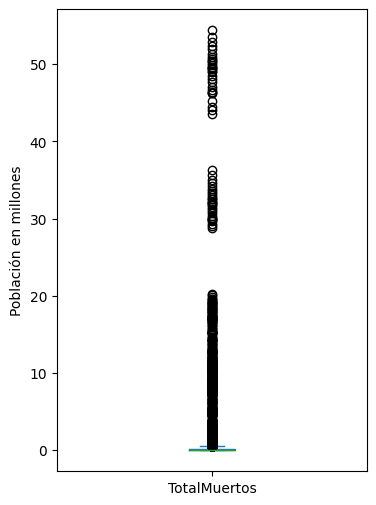

In [ ]:
#Dibujando diagrama de caja y bigotes
ax=(CausasMuerte["TotalMuertos"]/1_000_000).plot.box(figsize=(4,6))
ax.set_ylabel("Población en millones")

In [ ]:
#Calculando la tabla de frecuencias e histogramas
binnedPopulation=pd.cut(CausasMuerte["TotalMuertos"],10)
binnedPopulation.value_counts()

,count
TotalMuertos,
"(-54394.314, 5439431.4]",6775
"(5439431.4, 10878862.8]",289
"(10878862.8, 16318294.2]",98
"(16318294.2, 21757725.6]",51
"(27197157.0, 32636588.4]",20
"(48954882.6, 54394314.0]",17
"(43515451.2, 48954882.6]",13
"(32636588.4, 38076019.8]",10
"(21757725.6, 27197157.0]",0


Text(0, 0.5, 'Población en millones')

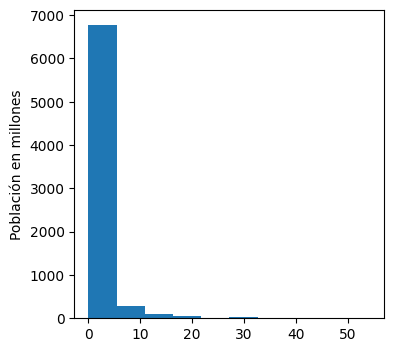

In [ ]:
ax=(CausasMuerte["TotalMuertos"]/1_000_000).plot.hist(figsize=(4,4))
ax.set_ylabel("Población en millones")

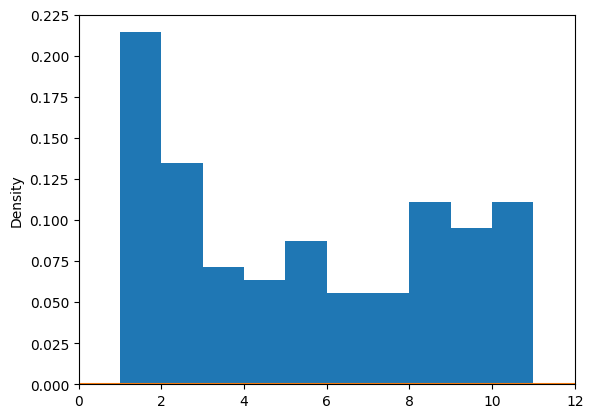

In [ ]:
#Diagrama de dispersión y curva de densidad
ax=CausasMuerte["TotalMuertos"].plot.hist(density=True,xlim=[0,12],bins=range(1,12))
CausasMuerte["TotalMuertos"].plot.density(ax=ax)
ax.set_label("Tasa de Muertes por cada 1000000 habitantes")

### Preguntas
Sobre exploración en distribución de datos

a) Qué información nos suministra los percentiles de tasa de muertos por pais?

•	5% (0.05): 98.0 → El 5% de los países registra menos de 98 muertes.

•	25% (0.25): 5,976.0 → El 25% de los países tiene menos de 5,976 muertes.

•	75% (0.75): 200,364.0 → El 75% de los países reporta menos de 200,364 muertes.

•	95% (0.95): 8,679,416.8 → El 95% de los países presenta menos de ~8.68 millones de muertes.

Distribución desigual: La brecha entre percentiles (ej. 5% a 25% vs. 75% a 95%) sugiere una gran disparidad en el número de muertes entre países, probablemente influenciada por diferencias poblacionales o contextos socioeconómicos.

Valores atípicos: El percentil 95 es extremadamente alto, indicando que un 5% de los países tiene cifras de muertes excepcionalmente elevadas, posiblemente naciones muy pobladas o afectadas por crisis.

Dispersión de datos: Entre el 25% y 75% (5,976 a 200,364) hay una variación significativa, reflejando heterogeneidad en los datos.


b) Explique con sus propias palabras qué información suministra el diagrama de caja con respecto a la tasa de muertos por pais.

primero debemos tener en cuenta que al realizar diagrama de caja y bigotes podemos ver que para esta base de datos vamos a obtener una cantidad MUY considerable de outliers, para corregir esto podríamos realizar una normalización y balanceo de datos


c) Cómo podría agregarse los estados que se encuentran en cada uno de los intervalos? Si no sabe la respuesta, complete la tabla de forma manual y postee su respuesta. Interprete los resultados obtenidos.

